## Problem Statement

This dataset contains information on the insurance claim. each observation is different policyholder with various features like the age of the person, the gender of the policyholder, body mass index, providing an understanding of the body, number of children of the policyholder, smoking state of the policyholder and individual medical costs billed by health insurance.

       Feature                                      Description

        age                                   age of policyholder

        sex                                   male(1)/female(0)

        bmi                                   body mass index(kg / m2)

        children                              number of children/dependents of policyholder

        smoker                                smoking state nonsmoker(0)/smoker(1)

        region                                residential area northeast(0)/northwest(1)/southeast(2)/southwest(3)

        charges                               medical cost
    
        insuranceclaim                        yes(1)/no(0)


Using Proper model try to predict the insurance claim

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load Dataset
df=pd.read_csv("insurance.csv")

In [3]:
#Doing Basic Operations
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
df.size

10704

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
#checking for null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [8]:
#describe for numeric features
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


#### Observations:
1.There are no Categoric features in our data.

2.There are no null values in our datset.

3.Minimum age of policyholder is 18 i.e only legal age barrier people have optioned for policy.

4.Maximum age of policyholder is 64.

5.Mostly people have 1 or 2 childrens but there is some sort of outliers we can say where maximum childens are 5.

6.Minumum charges for policy is 1121 and maximum is 63770.

7.A clear corelation between charges and age can be seen as age increases,charges increases because till age 51 charges is 16639 and for 64 it is 63770.

## EDA : Exploratory Data Analysis

##### Googling we have following information for BMI,now lets understand this in our data
    Underweight: BMI less than 18.5
    Normal weight: BMI between 18.5 and 24.9
    Overweight: BMI between 25 and 29.9
    Obese: BMI 30 or higher

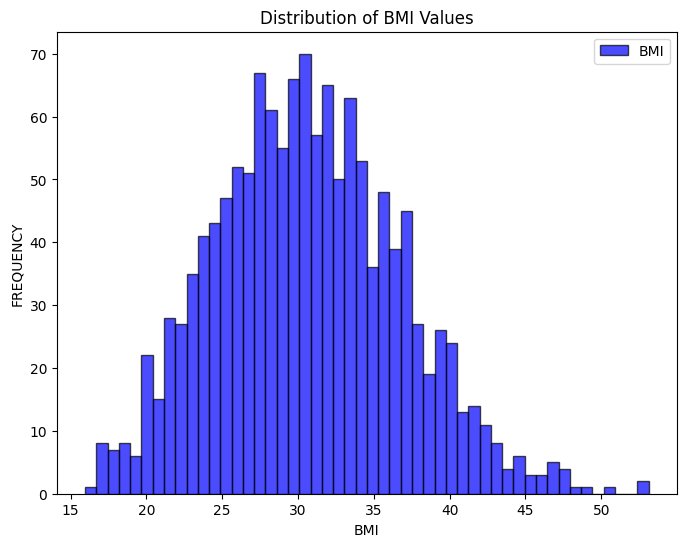

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df["bmi"],bins=50,color="blue",histtype="bar",label="BMI",edgecolor="Black",alpha=0.7)
plt.xlabel("BMI")
plt.ylabel("FREQUENCY")
plt.title('Distribution of BMI Values')
plt.legend()
plt.show()

In [10]:
#plotting BMI with AGE

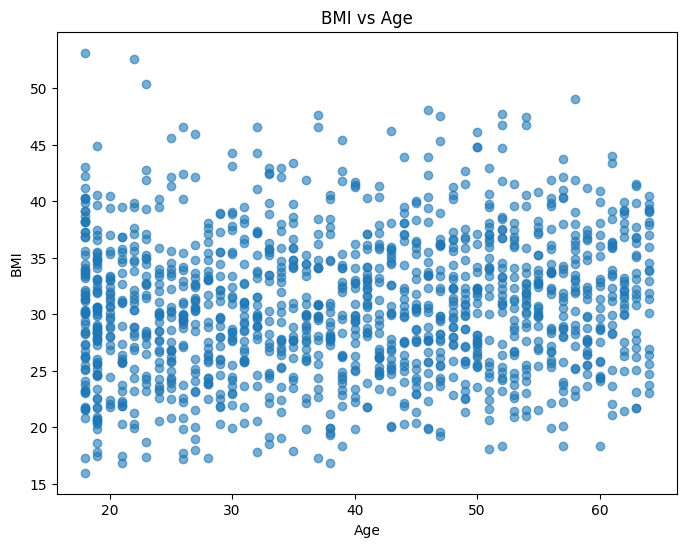

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df["age"],df["bmi"],alpha=0.6)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI vs Age')
plt.show()

In [12]:
#plotting BMI with Charges

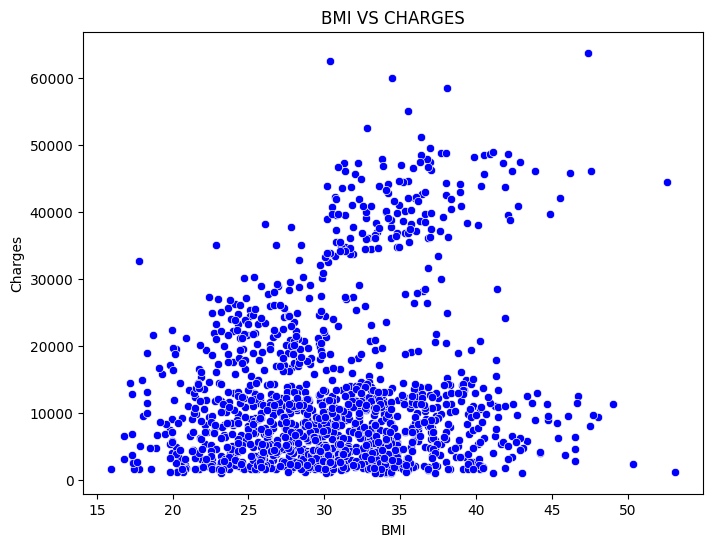

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["bmi"],y=df["charges"],color="blue")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI VS CHARGES")
plt.show()

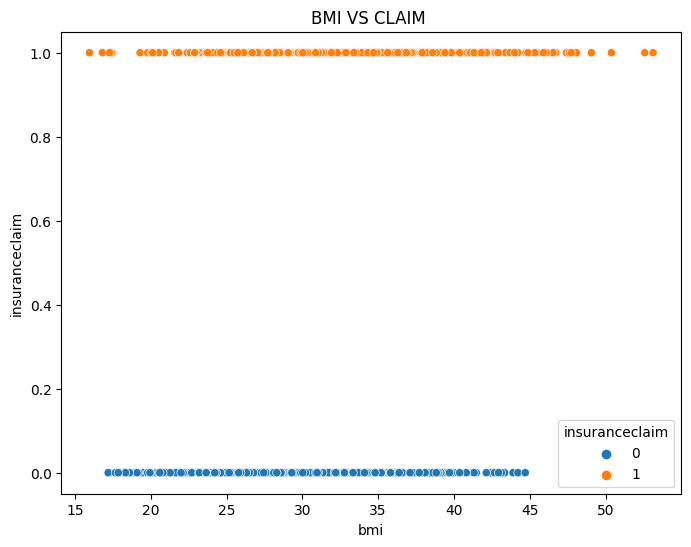

In [14]:
#plotting BMI with Claim
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["bmi"],y=df["insuranceclaim"],color="blue",hue=df["insuranceclaim"])
plt.title("BMI VS CLAIM ")
plt.show()

#### Observations:
1.BMI is **Normally Distributed**.

2.We were trying to find any sort of relationship between BMI and AGE but plotting it did not show any sort of relationship.

3.We were not able to find any sort of relationship between **Charges and Bmi** i.e Charges of policy is not dependent on BMI of person.

4.People ranging of all BMI's have made a claim

In [15]:
#Lets Plot for Age

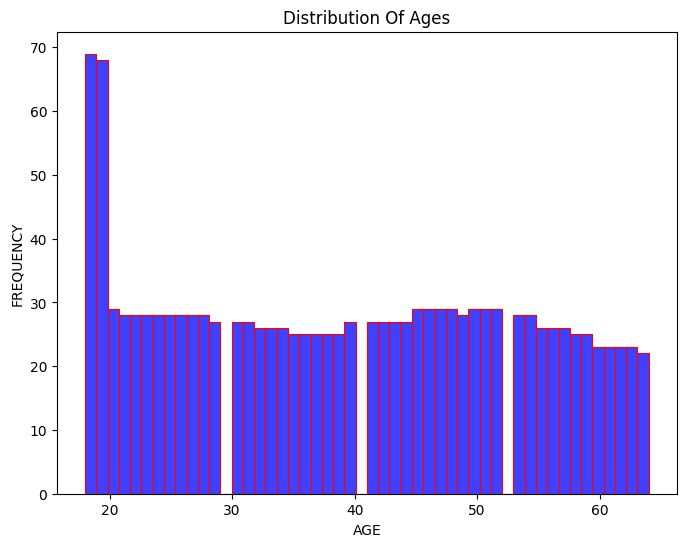

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(df["age"],color="blue",bins=50,edgecolor="red")
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")
plt.title("Distribution Of Ages")
plt.show()

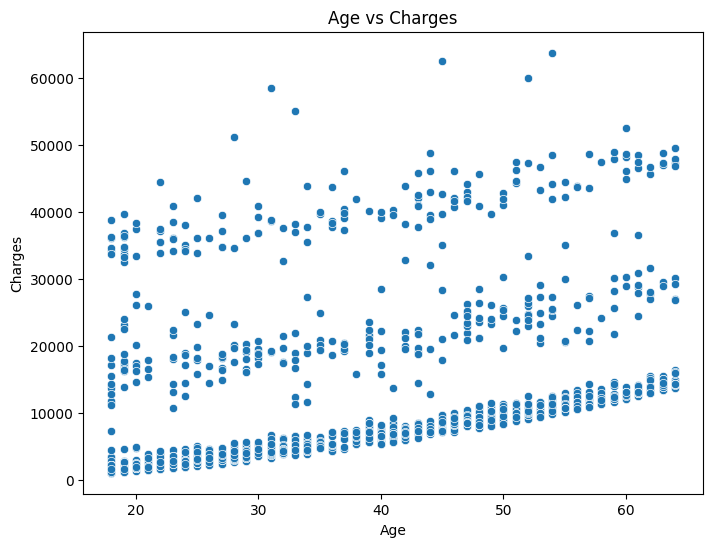

In [17]:
#Age vs Charges
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["age"],y=df["charges"])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

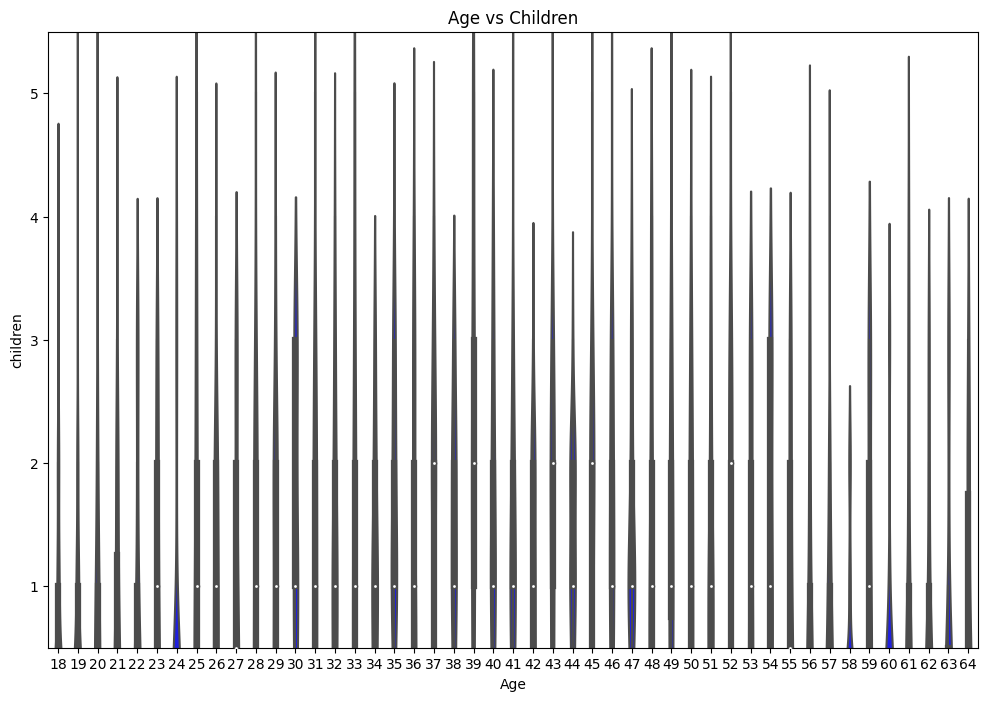

In [18]:
#Age vs Childrens
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x=df["age"],y=df["children"],color="blue")
ax.set_ylim(bottom=0.5, top=df['children'].max()+0.5)
plt.xlabel('Age')
plt.ylabel('children')
plt.title('Age vs Children')
plt.show()

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_19092\3712782960.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["age"],y=df["insuranceclaim"], palette="pastel",ci=None)


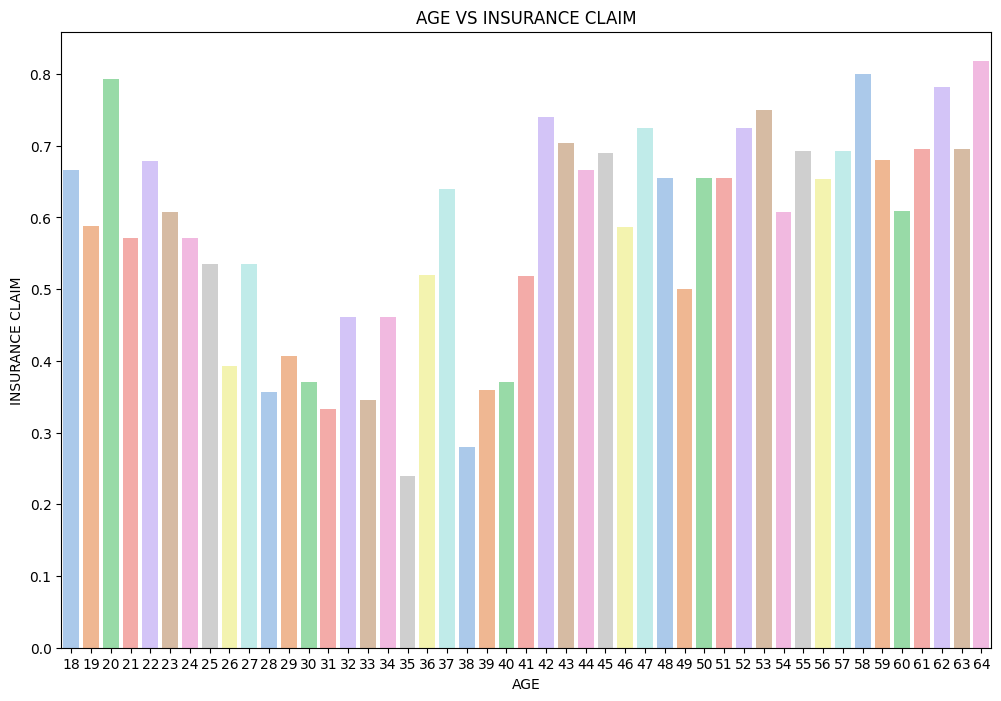

In [19]:
#Age vs Insurance Claim
plt.figure(figsize=(12,8))
sns.barplot(x=df["age"],y=df["insuranceclaim"], palette="pastel",ci=None)
plt.xlabel("AGE")
plt.ylabel("INSURANCE CLAIM")
plt.title("AGE VS INSURANCE CLAIM")
plt.show()

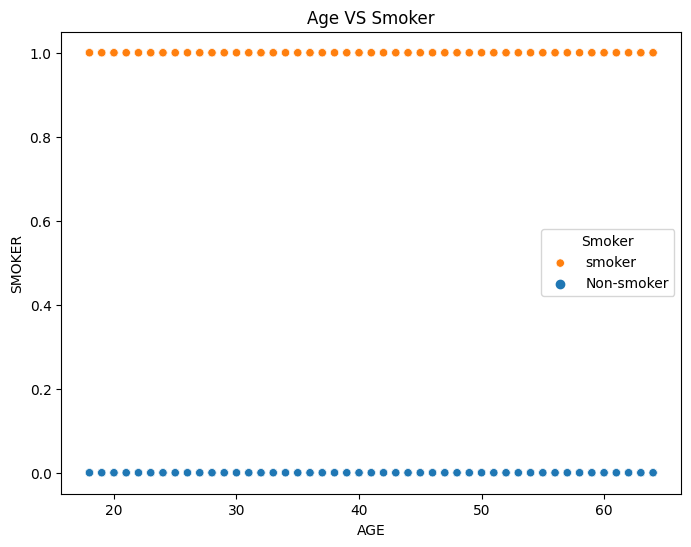

In [20]:
#Plotting For Smoker and age
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["age"],y=df["smoker"],hue=df["smoker"])
plt.xlabel("AGE")
plt.ylabel("SMOKER")
plt.title("Age VS Smoker")
plt.legend(title="Smoker", labels=["smoker", "Non-smoker"])
plt.show()

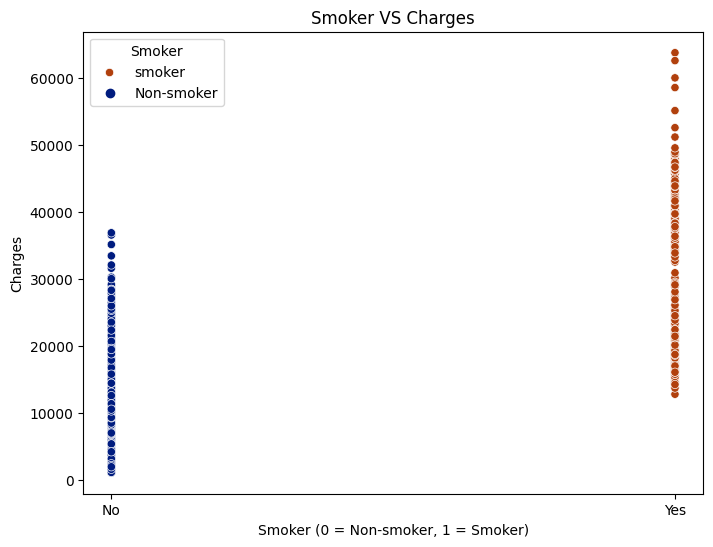

In [21]:
#Plotting For Smoker and charges
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["smoker"],y=df["charges"],hue=df["smoker"],palette="dark")
plt.xlabel("Smoker (0 = Non-smoker, 1 = Smoker)")
plt.ylabel("Charges")
plt.title("Smoker VS Charges")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.legend(title="Smoker", labels=["smoker", "Non-smoker"])
plt.show()

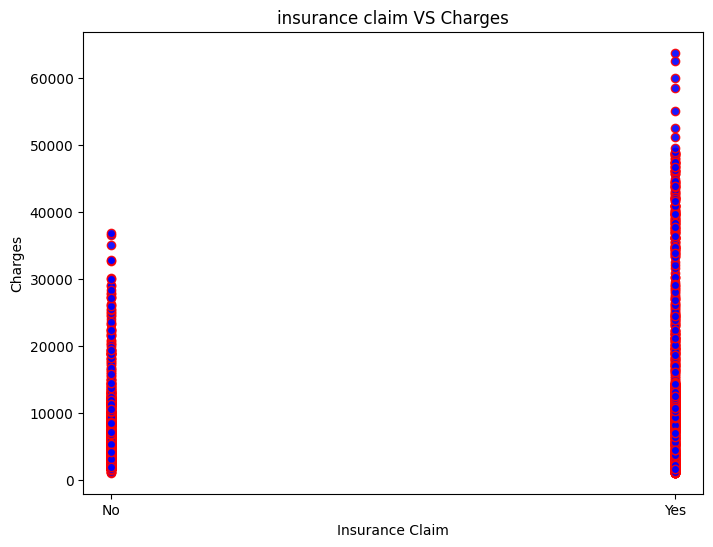

In [22]:
#Plotting for Charges VS Claim 
plt.figure(figsize=(8,6))
plt.scatter(x=df["insuranceclaim"],y=df["charges"],color="blue",edgecolors="red",alpha=0.9)
plt.xlabel("Insurance Claim")
plt.ylabel("Charges")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.title("insurance claim VS Charges")
plt.show()

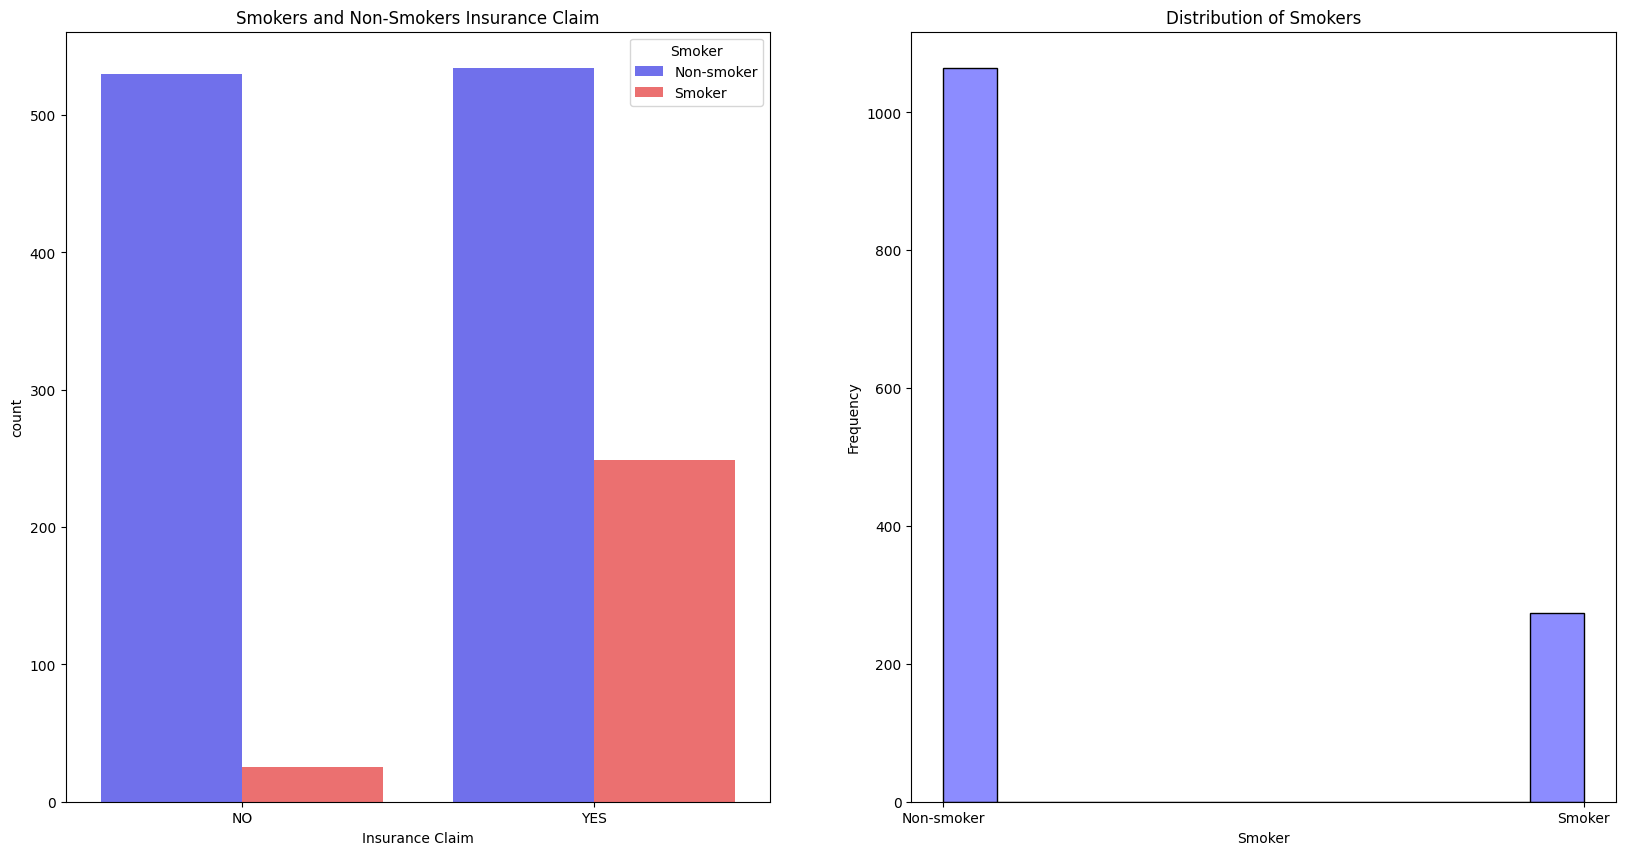

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

# subplot for the countplot
sns.countplot(x=df["insuranceclaim"], hue=df["smoker"], palette=["#5C5CFF", "#FF5C5C"], ax=axs[0])
axs[0].set_xlabel("Insurance Claim")
axs[0].legend(title="Smoker", labels=["Non-smoker", "Smoker"])
axs[0].set_xticks([0,1])
axs[0].set_xticklabels(["NO","YES"])
axs[0].set_title("Smokers and Non-Smokers Insurance Claim")

# subplot for the histogram
sns.histplot(x=df['smoker'], ax=axs[1], color='#5C5CFF', alpha=0.7)
axs[1].set_xlabel('Smoker')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Smokers')
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(["Non-smoker","Smoker"])
plt.show()

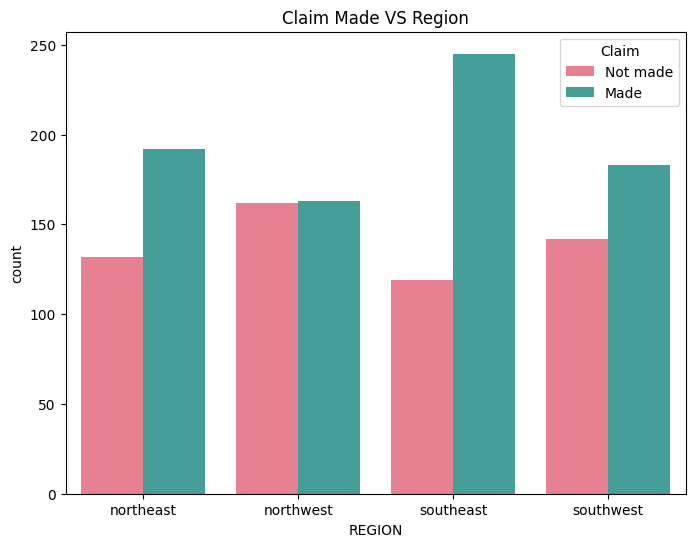

In [24]:
#plotting for claim made vs region
plt.figure(figsize=(8,6))
sns.countplot(x=df["region"],hue=df["insuranceclaim"],palette="husl")
plt.xlabel("REGION")
plt.legend(title="Claim",labels=['Not made', 'Made'])
plt.title("Claim Made VS Region")
regions=['northeast', 'northwest', 'southeast', 'southwest']
plt.xticks(ticks=[0,1,2,3],labels=regions)
plt.show()

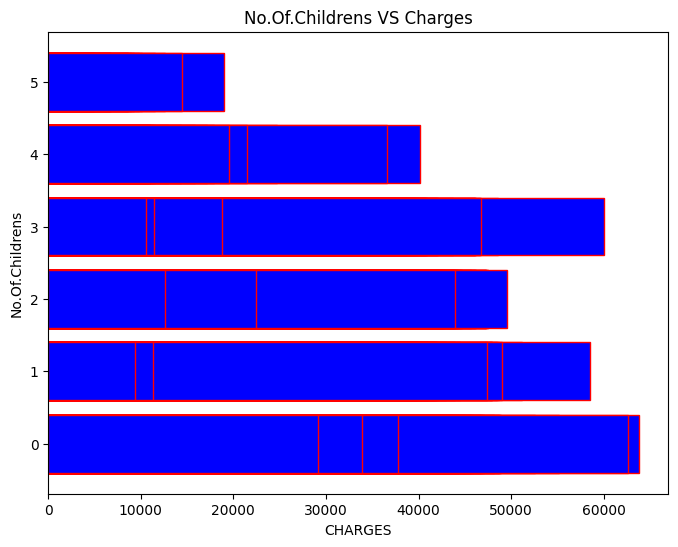

In [25]:
#plotting for children vs charges

plt.figure(figsize=(8,6))
plt.barh(df["children"],df["charges"],color="blue",edgecolor="red")
plt.xlabel("CHARGES")
plt.ylabel("No.Of.Childrens")
plt.title("No.Of.Childrens VS Charges")
plt.show()

#### Observations:
1.Constant no.of people are buying insurance after year of 20 age but no.of people buying insurance from 18-20 are more in comparision to others.Its more than 2X than people of other ages.

2.There are some people who are starting with less amount of charges and increasing with time,linear relationship can be seen between them.But no pattern can be seen between some people as they are starting with more charges when age is less.

3.All sort of people ranging from/starting with 18 are having childrens.

4.There are bunch of people from all ages as Smokers i.e.Not some age group people are only smokers.

5.People who are smoker are having high charges.

6.There are more no.of Non-Smokers in dataset,but we also plotted that those who are smokers they have made more claim for insurance.

7.Claims are made from each region but from southeast region claims made are much higher in terms of claim not made.

8.No pattern found In no.of Children VS charges paid.

### Corelations:

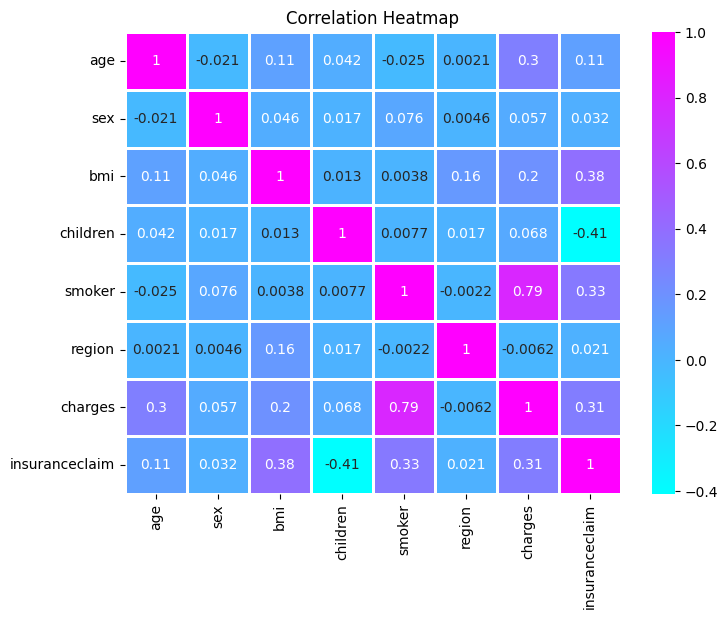

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="cool", linewidths=0.9)
plt.title("Correlation Heatmap")
plt.show()

### Observations:
1.Childrens and claim is **negatively correlated**.

2.**BMI** is Correlated with **Claim**.

3.No much Corelation can be seen between features themselves,so no need to drop any features.

4.**Smoker.BMI,Charges** are corelated maximum with **target i.e Insurance Claim**.

### **Conclusions From EDA:**

1.A large number of people at the age of 18-19 have purchased an insurance policy compared to other age groups.

2.There is a sudden drop in the number of purchases among individuals above the age of 19.

3.This could be due to specific marketing or promotional campaigns targeting this particular age group.

4.It may be worth further investigating data points such as an **individual at the age of 18 having 4 kids** to ensure accuracy and representative of the rest of the data.


### Check For Outliers:

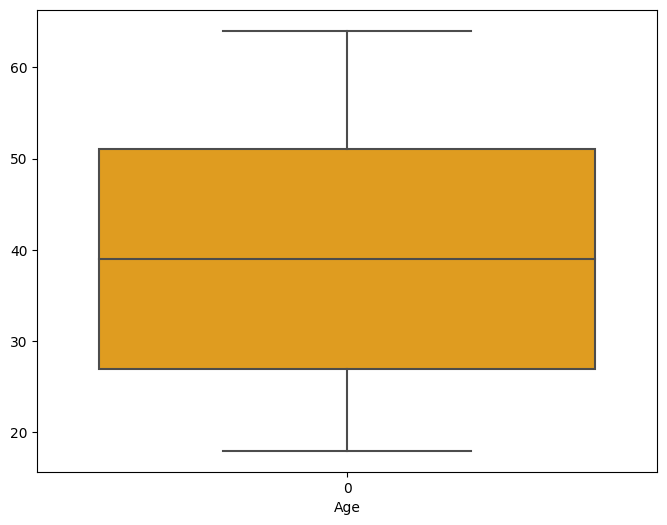

In [27]:
#age
plt.figure(figsize=(8,6))
sns.boxplot(df["age"],color="orange")
plt.xlabel("Age")
plt.show()

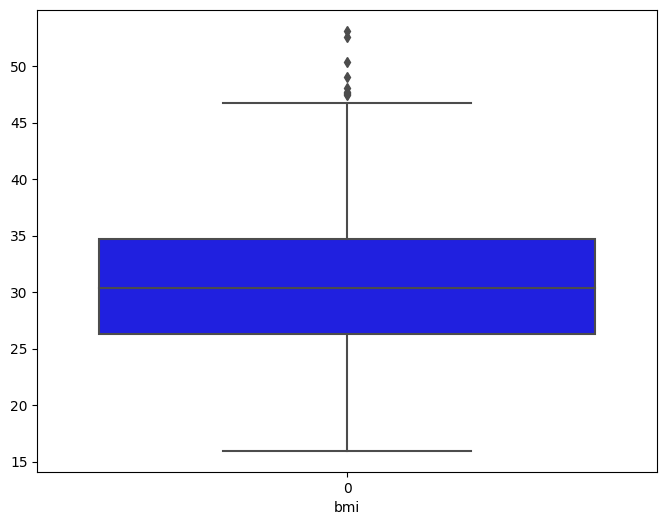

In [28]:
#bmi
plt.figure(figsize=(8,6))
sns.boxplot(df["bmi"],color="blue")
plt.xlabel("bmi")
plt.show()

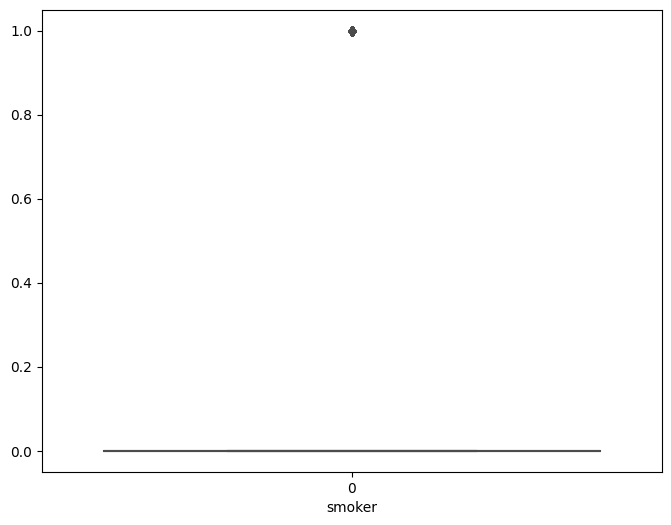

In [29]:
#smoker
plt.figure(figsize=(8,6))
sns.boxplot(df["smoker"],color="blue")
plt.xlabel("smoker")
plt.show()

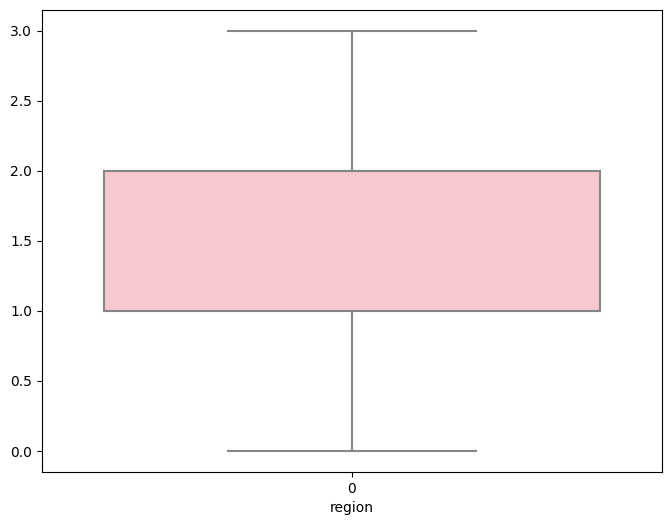

In [30]:
#smoker
plt.figure(figsize=(8,6))
sns.boxplot(df["region"],color="pink")
plt.xlabel("region")
plt.show()

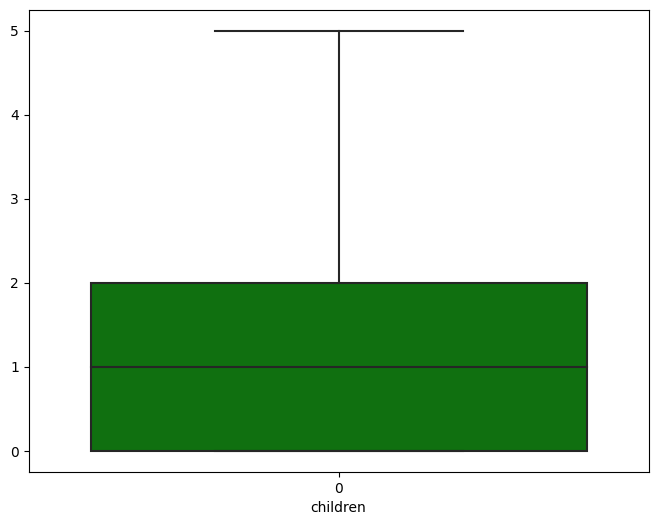

In [31]:
#smoker
plt.figure(figsize=(8,6))
sns.boxplot(df["children"],color="green")
plt.xlabel("children")
plt.show()

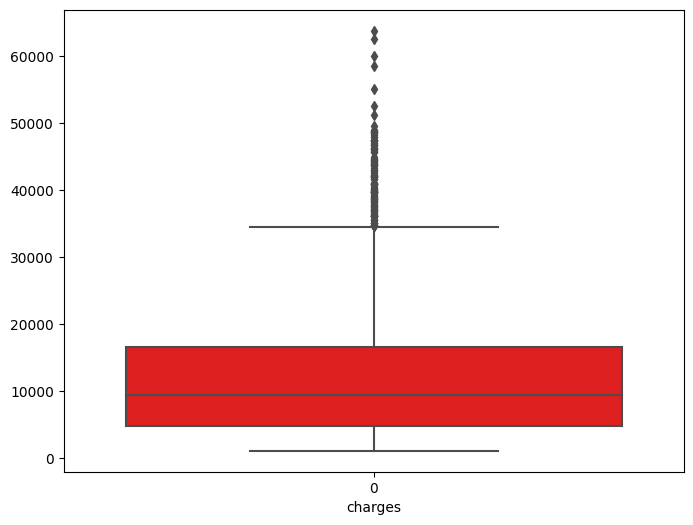

In [32]:
#charges
plt.figure(figsize=(8,6))
sns.boxplot(df["charges"],color="red")
plt.xlabel("charges")
plt.show()

### Observations:
1.There are outliers in **smoker** and **charges**.
##### But we are not going to drop outliers as there is corelation between these features and target.

### Scaling:

In [33]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=df.drop(["insuranceclaim"],axis=1)
df_scaled
df_scaled_1=scaler.fit_transform(df_scaled)

In [34]:
#Converting it into dataframe:
df_scaled=pd.DataFrame(df_scaled_1,columns=df_scaled.columns)
df_scaled.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


### Next, we will select the best model for our problem by evaluating various models on the dataset and selecting the one with the highest performance. We will then optimize the model by tuning its hyperparameters to improve its performance further.


In [35]:
#Dividing Data into Training and Testing Set
X=df_scaled
y=df["insuranceclaim"]
print("X Shape: ",X.shape)
print("y Shape: ", y.shape)

X Shape:  (1338, 7)
y Shape:  (1338,)


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (1070, 7)
X_test:  (268, 7)
y_train:  (1070,)
y_test:  (268,)


### 1.Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
#Accuracy On training set
print("Accuracy on training : ",lr.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",lr.score(X_test,y_test))

Accuracy on training :  0.8869158878504673
Accuracy on testing :  0.8619402985074627


In [38]:
from sklearn.linear_model import LogisticRegressionCV
lr=LogisticRegressionCV()
lr.fit(X_train,y_train)
#Accuracy On training set
print("Accuracy on training : ",lr.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",lr.score(X_test,y_test))

Accuracy on training :  0.8869158878504673
Accuracy on testing :  0.8656716417910447


###### Both Accuracy are nearbit same

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
y_pred=lr.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))

confusion matrix:
 [[ 92  15]
 [ 21 140]]


Accuracy score: 0.8656716417910447
recall:  0.8695652173913043
Precison:  0.9032258064516129
F1-score:  0.8860759493670886
Specifity:  0.8598130841121495


In [40]:
auc=roc_auc_score(y_test,y_pred)
print("auc : ",auc)

auc :  0.8646891507517269


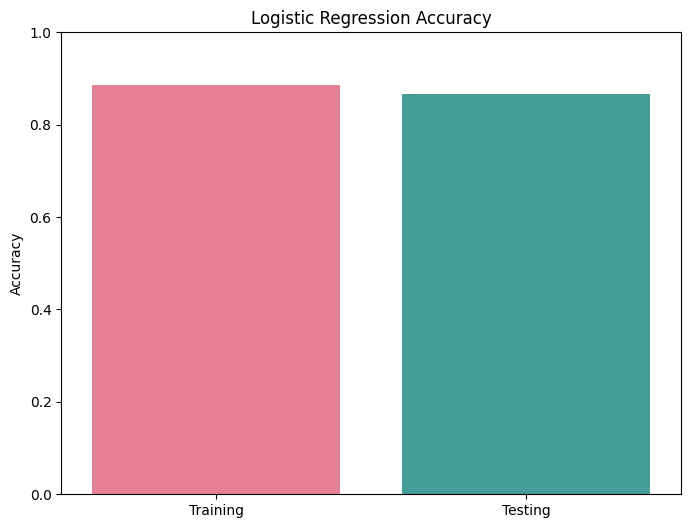

In [41]:
train_acc = lr.score(X_train, y_train)
test_acc = lr.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()

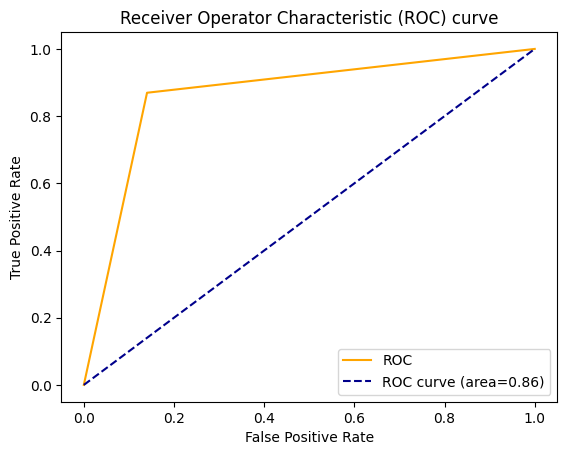

In [42]:
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

### 2.Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
#Accuracy On training set
print("Accuracy on training : ",nb.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",nb.score(X_test,y_test))

Accuracy on training :  0.719626168224299
Accuracy on testing :  0.7089552238805971


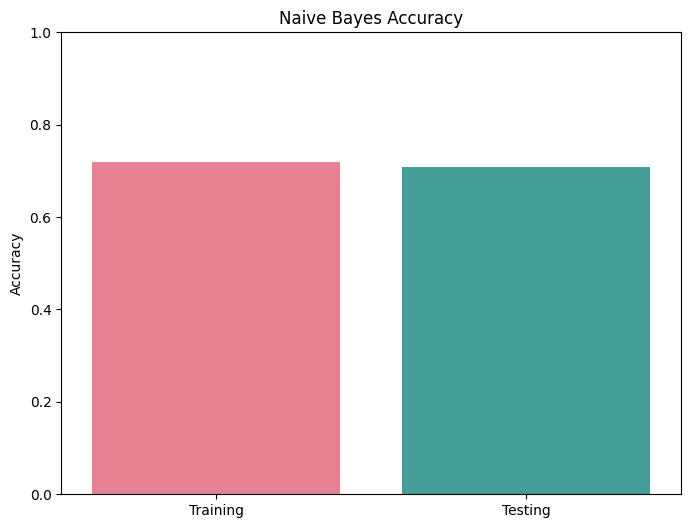

In [44]:
train_acc = nb.score(X_train, y_train)
test_acc = nb.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy')
plt.show()

### 3.Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

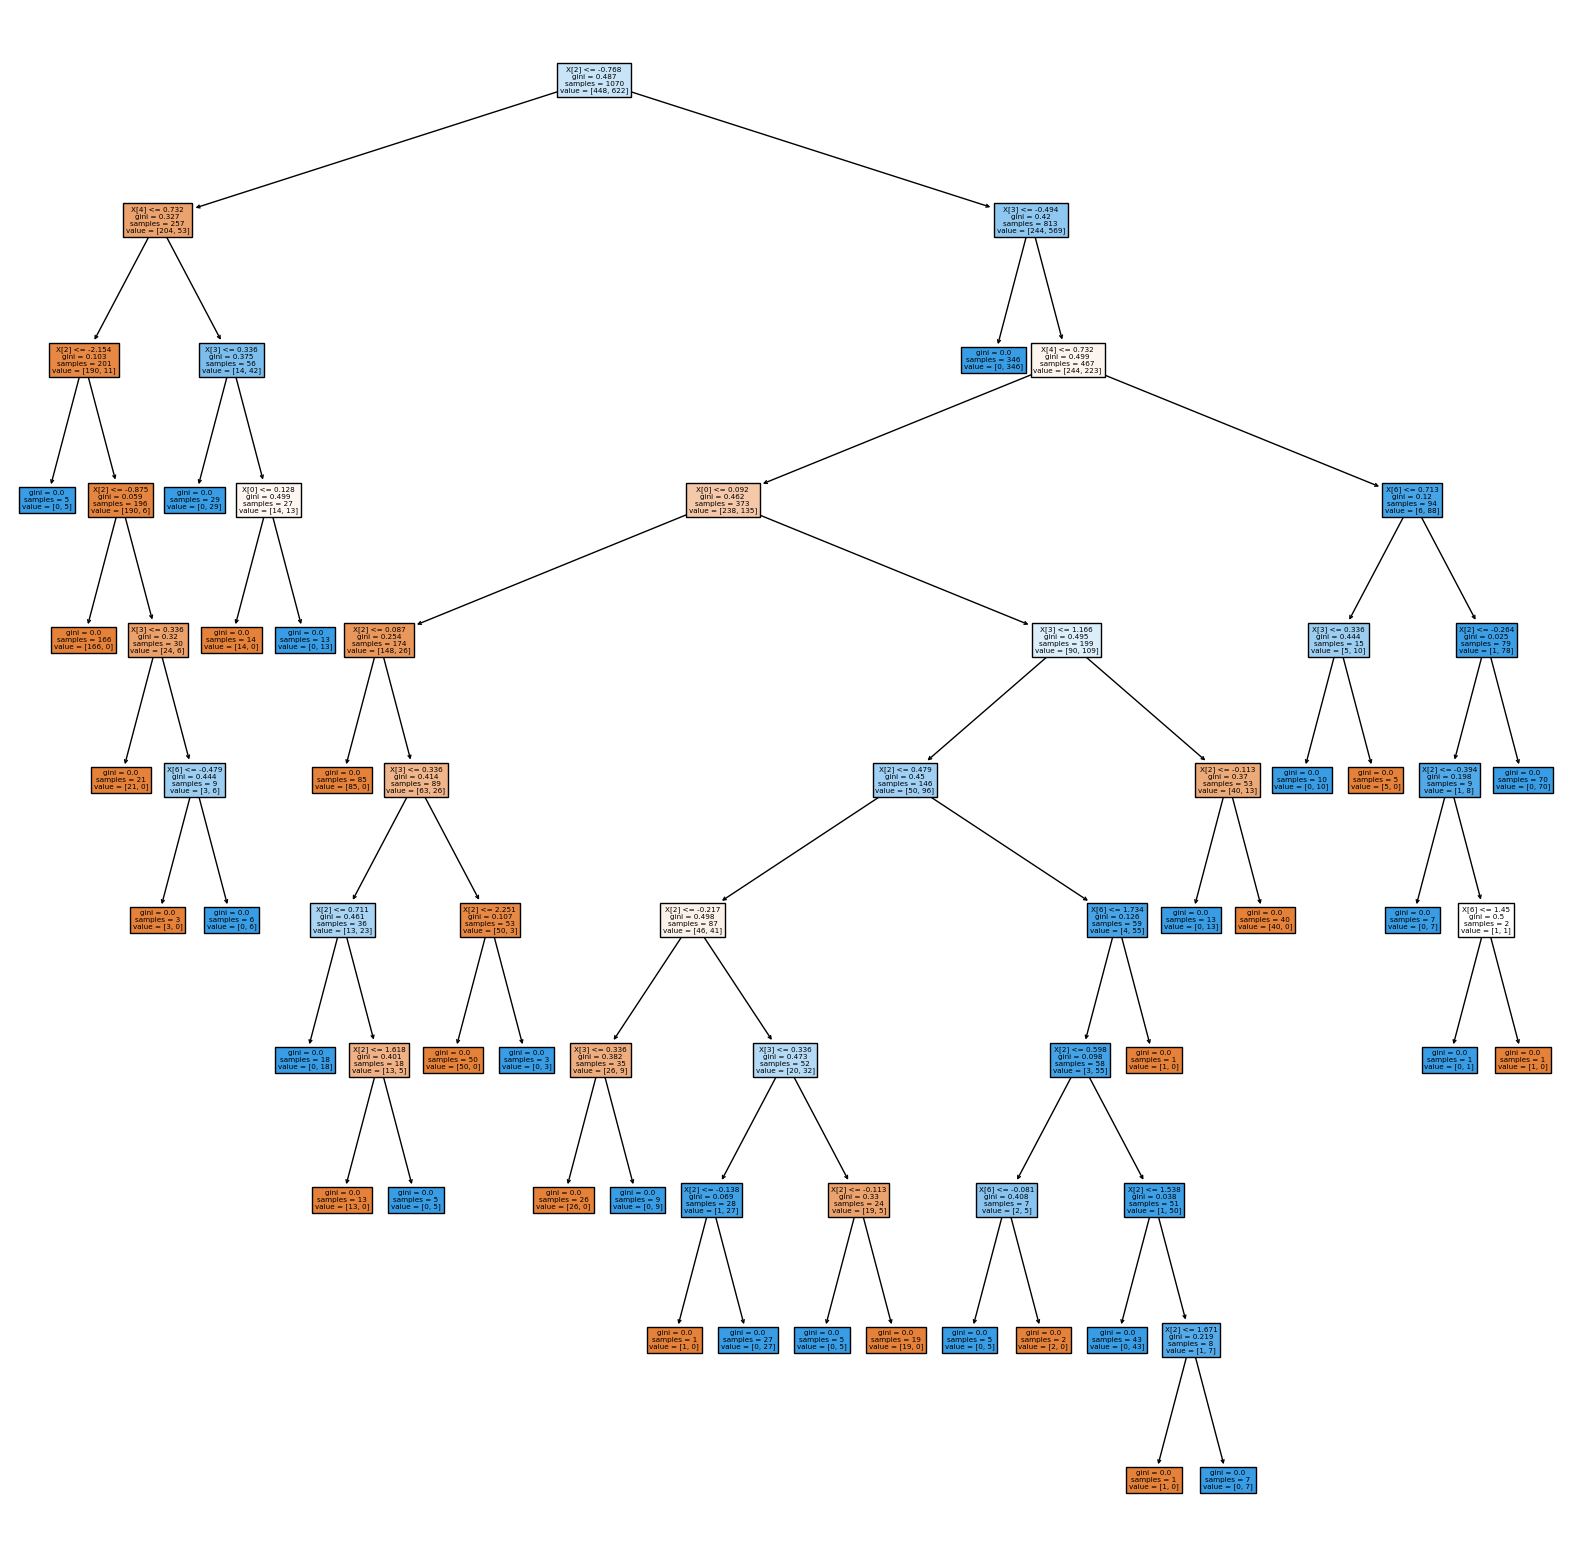

In [46]:
#Visualizing Tree
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt.fit(X_train,y_train),filled=True)
plt.show()

In [47]:
#Save this tree:
plt.savefig("Decison_Tree_image")

<Figure size 640x480 with 0 Axes>

In [48]:
#Accuracy On training set
print("Accuracy on training : ",dt.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",dt.score(X_test,y_test))

Accuracy on training :  1.0
Accuracy on testing :  0.9738805970149254


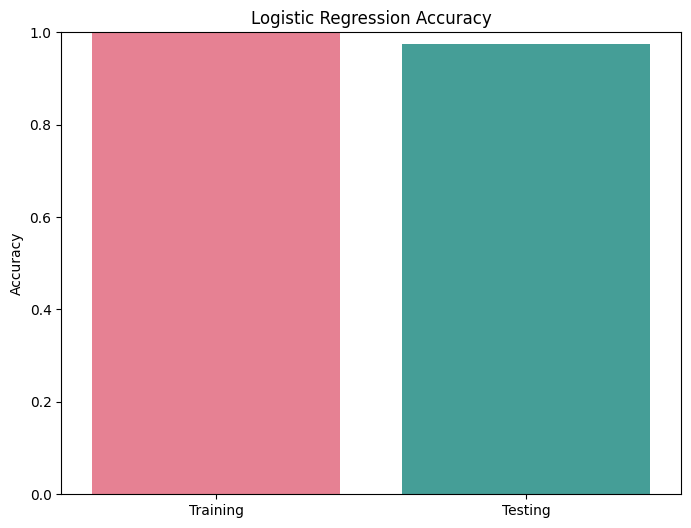

In [49]:
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()

confusion matrix:
 [[102   5]
 [  2 159]]
Accuracy score: 0.9738805970149254
recall:  0.9875776397515528
Precison:  0.9695121951219512
F1-score:  0.9784615384615385
Specifity:  0.9532710280373832


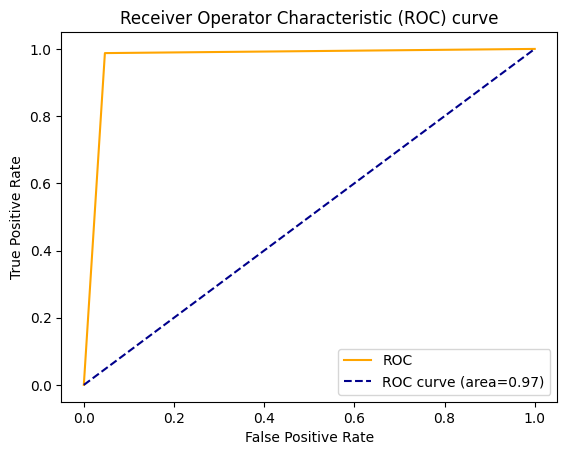

In [50]:
y_pred=dt.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))

print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

### In decison tree there is no need of scaling lets see if there is any change on accuracy with non-scaled data

In [51]:
#Dividing Data into Training and Testing Set
X_dt=df.drop(["insuranceclaim"],axis=1)
y_dt=df["insuranceclaim"]
print("X Shape without scaled: ",X_dt.shape)
print("y Shape without scaled: ", y_dt.shape)
from sklearn.model_selection import train_test_split
X_train_dt,X_test_dt,y_train_dt,y_test_dt=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train without scaled: ",X_train_dt.shape)
print("X_test without scaled: ",X_test_dt.shape)
print("y_train without scaled: ",y_train_dt.shape)
print("y_test without scaled: ",y_test_dt.shape)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_dt,y_train_dt)
#Accuracy On training set
print("Accuracy on training without scaled: ",dt.score(X_train_dt,y_train_dt))
#Accuracy On testing set
print("Accuracy on testing without scaled : ",dt.score(X_test_dt,y_test_dt))

X Shape without scaled:  (1338, 7)
y Shape without scaled:  (1338,)
X_train without scaled:  (1070, 7)
X_test without scaled:  (268, 7)
y_train without scaled:  (1070,)
y_test without scaled:  (268,)
Accuracy on training without scaled:  1.0
Accuracy on testing without scaled :  0.9738805970149254


### RESULTS:

1.Accuracy remaining same with both scaled and unscaled data.
###### We'll follow our approach with going with scaled data.

### 4.Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
#Accuracy On training set
print("Accuracy on training : ",rf.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",rf.score(X_test,y_test))

Accuracy on training :  1.0
Accuracy on testing :  0.9216417910447762


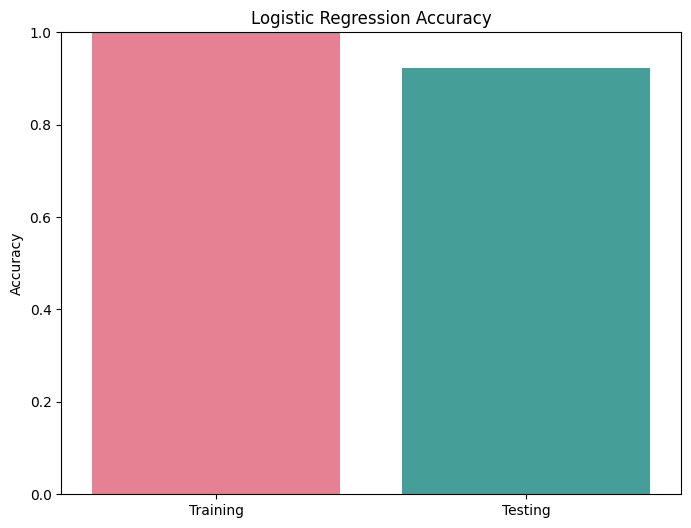

In [54]:
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()

confusion matrix:
 [[100   7]
 [ 14 147]]
Accuracy score: 0.9216417910447762
recall:  0.9130434782608695
Precison:  0.9545454545454546
F1-score:  0.9333333333333332
Specifity:  0.9345794392523364


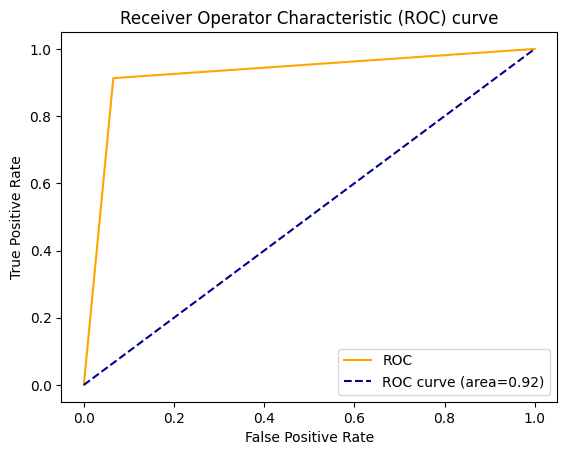

In [55]:
y_pred=rf.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))

print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

### RESULTS:

1.Accuracy is not good than Decison Tree infact it has degraded.

### 5.XG Boost

In [56]:
import xgboost
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
#Accuracy On training set
print("Accuracy on training : ",xg.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",xg.score(X_test,y_test))

Accuracy on training :  1.0
Accuracy on testing :  0.9701492537313433


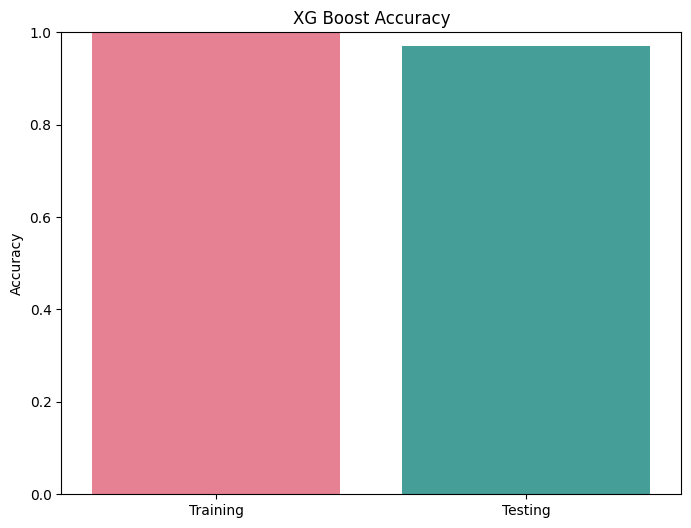

In [58]:
train_acc = xg.score(X_train, y_train)
test_acc = xg.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('XG Boost Accuracy')
plt.show()

confusion matrix:
 [[102   5]
 [  3 158]]
Accuracy score: 0.9701492537313433
recall:  0.9813664596273292
Precison:  0.9693251533742331
F1-score:  0.9753086419753085
Specifity:  0.9532710280373832


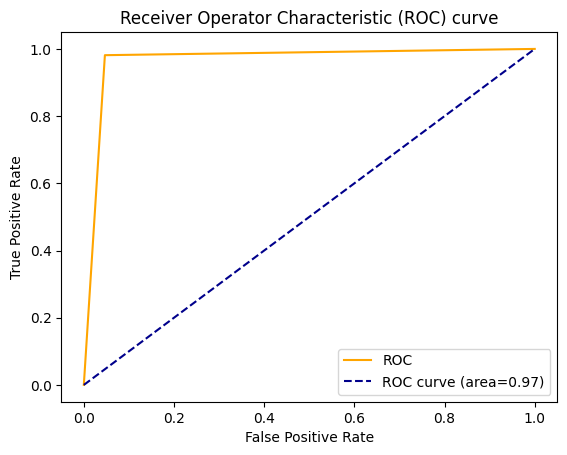

In [59]:
y_pred=xg.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))

print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

### RESULTS:

1.Accuracy and confusion matrix for decision tree and xgboost are same.i.e.no improvement is seen in xgboost.

### Plot for viewing accuracy of all models:

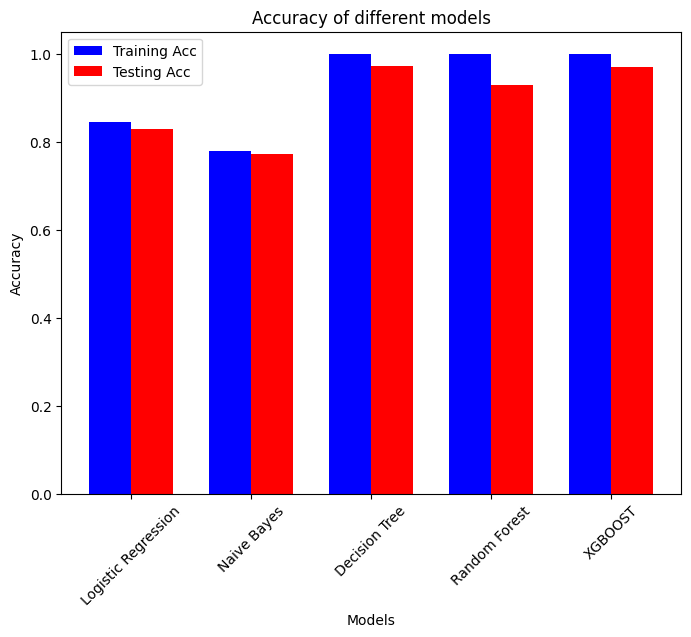

In [60]:
# Model names
models = ["Logistic Regression", 'Naive Bayes',"Decision Tree","Random Forest","XGBOOST"]

# Training and testing accuracy for each model
train_acc = [0.846, 0.779, 1, 1, 1]
test_acc = [0.828, 0.772, 0.972, 0.929, 0.970]

# Width of bars
bar_width = 0.35

# X-coordinates for the bars
x_train = [i - bar_width/2 for i in range(len(models))]
x_test = [i + bar_width/2 for i in range(len(models))]

# Plot the bars for training and testing accuracy
plt.figure(figsize=(8,6))
plt.bar(x_train, train_acc, width=bar_width, label='Training Acc', color="blue")
plt.bar(x_test, test_acc, width=bar_width, label='Testing Acc', color="red")

# Set the title, labels, and ticks for the plot
plt.title('Accuracy of different models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(range(len(models)), models, rotation=45)
plt.legend()

# Display the plot
plt.show()

### Saving the Model

In [61]:
from joblib import dump,load
dump(dt,"Insurance.joblib")

['Insurance.joblib']

### RESULTS:

1.Decison tree was our best model for this classification problem of Insurance Claim.

2.XG Boost also had same accuracy,but we decided to go with decison tree.

3.The decision to finalize the Decision Tree model over XGBoost was based on multiple factors such as interpretability, ease of implementation, and computational efficiency. Decision trees provide a clear and intuitive understanding of the decision-making process and the factors driving the predictions. Moreover, they are computationally efficient and do not require extensive hyperparameter tuning. Therefore, given the accuracy being similar for both models, we decided to go with the Decision Tree as the final model.